# Tensorflow 첫 걸음

## 데이터 하나를 무작정 읽어보자

In [1]:
import numpy as np

raw_data = np.genfromtxt('./datas/x09.txt', skip_header=36)

raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

## 시각화

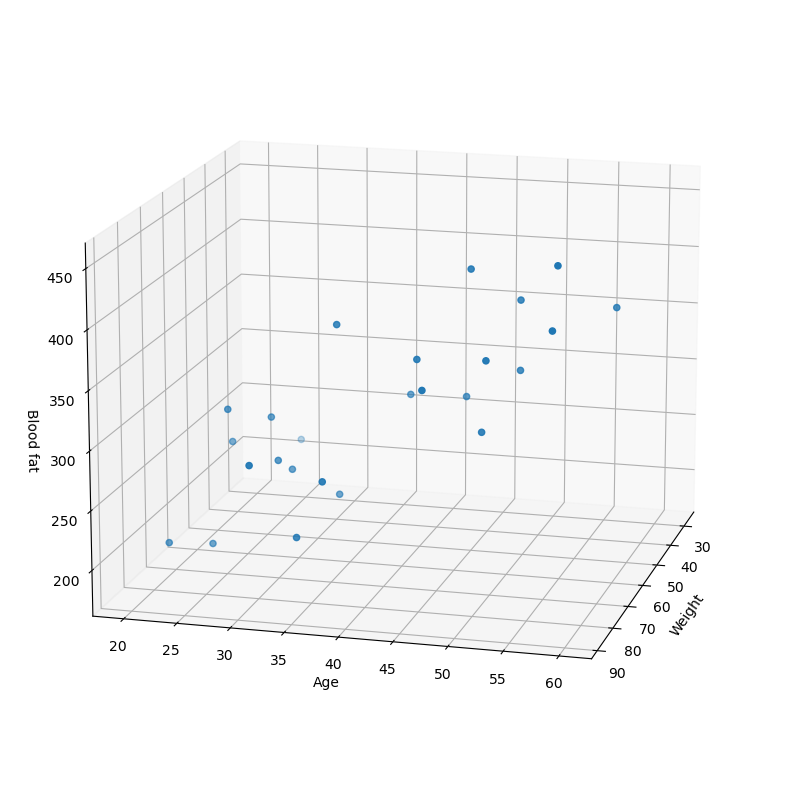

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:, 2], dtype=np.float32)
ys = np.array(raw_data[:, 3], dtype=np.float32)
zs = np.array(raw_data[:, 4], dtype=np.float32)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

## 학습 대상 데이터 추리기

In [6]:
x_data = np.array(raw_data[:, 2:4], dtype=np.float32) #2, 3번 컬럼이 Weight, Age
y_data = np.array(raw_data[:,4], dtype=np.float32)  # 4번 컬럼이 target인 blood fat

x_data.shape, y_data.shape

((25, 2), (25,))

In [9]:
y_data = y_data.reshape((25, 1))

y_data.shape

(25, 1)

## 딥러닝 신경망 구성 (tensorflow, keras)

In [12]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,))
])

model.compile(optimizer='rmsprop', loss='mse')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 모델 학습

In [14]:
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 183ms/step - loss: 191697.0000
Epoch 2/5000
1/1 [==============================] - 0s 3ms/step - loss: 191393.7344
Epoch 3/5000
1/1 [==============================] - 0s 2ms/step - loss: 191173.9219
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 190990.0625
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 190826.9219
Epoch 6/5000
1/1 [==============================] - 0s 2ms/step - loss: 190677.5000
Epoch 7/5000
1/1 [==============================] - 0s 4ms/step - loss: 190537.9219
Epoch 8/5000
1/1 [==============================] - 0s 2ms/step - loss: 190405.6406
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 190279.1406
Epoch 10/5000
1/1 [==============================] - 0s 4ms/step - loss: 190157.2188
Epoch 11/5000
1/1 [==============================] - 0s 3ms/step - loss: 190038.9844
Epoch 12/5000
1/1 [==============================] - 0s 37ms/step - loss

## loss 시각화

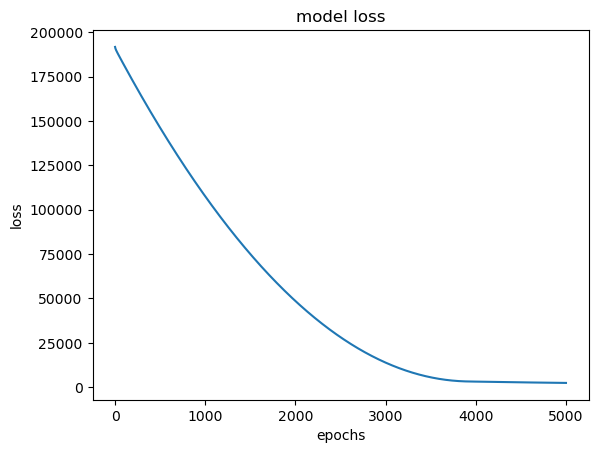

In [16]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show();

## predict
- 40세에 100kg인 사람의 blood fat은?

In [18]:
model.predict(np.array([100, 44]).reshape(1, 2))

1/1 [==============================] - 0s 29ms/step


array([[397.51993]], dtype=float32)

## 학습이 완료된 weight와 bias 확인해보기

In [19]:
W_, b_ = model.get_weights()

print('Weight : ', W_)
print('bias : ', b_)

Weight :  [[2.3079722]
 [3.6763186]]
bias :  [4.964689]


In [26]:
x1 = np.linspace(20, 100, 50).reshape(50, 1)    # 임의의 Weight(몸무게)
x2 = np.linspace(10, 70, 50).reshape(50, 1)     # 임의의 Age

X = np.concatenate((x1, x2), axis=1)    # Weight, Age로 이루어진 행렬 X
Z = np.matmul(X, W_) + b_               # X와 학습완료된 W_(가중치)를 내적하고 b_(bias)를 더해줌

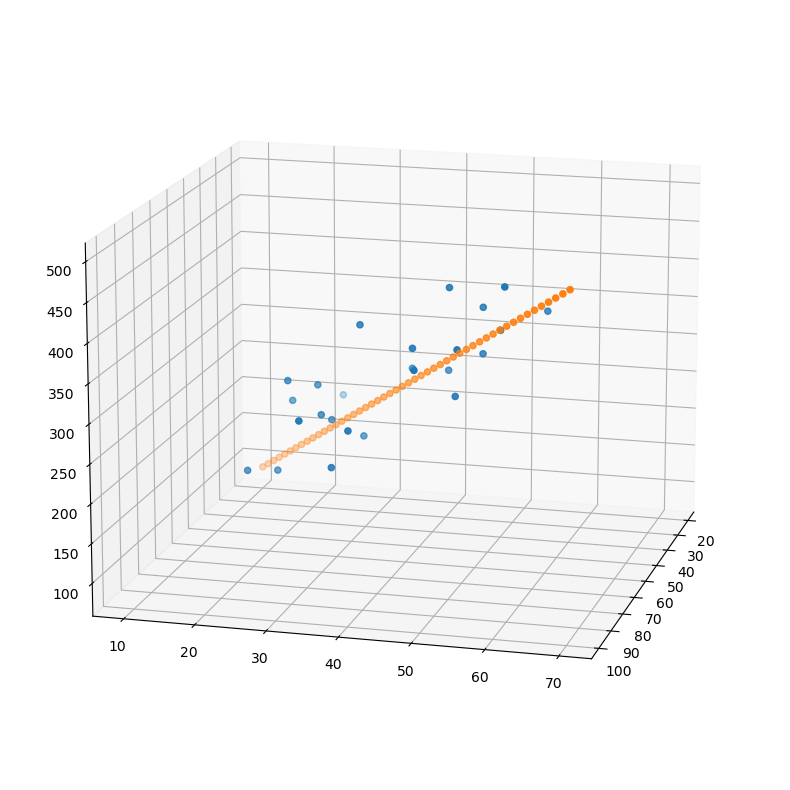

In [34]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)  #원본 데이터 시각화
ax.scatter(x1, x2, Z)   # 
ax.view_init(15, 15)
plt.show()